In [57]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import time 

In [58]:
def commutator(A,B):
    return np.dot(A,B) - np.dot(B,A)

def F1(X1,X2):
    return (g**2) * commutator(X2,commutator(X1,X2))

def F2(X1,X2):
    return (g**2) * commutator(X1,commutator(X2,X1))

def H(X1,X2,P1,P2):
    T = 1/2 * np.trace(np.dot(V1,V1) + np.dot(V2,V2))
    U = -(g**2)/4 * np.trace(np.dot(commutator(X1,X2),commutator(X1,X2)) + np.dot(commutator(X2,X1),commutator(X2,X1)))
    return np.abs(T + U)

# With Complex matrices

In [59]:
N = 2

X1 = np.zeros([N,N],dtype = complex)
X2 = np.zeros([N,N],dtype = complex)

for i in np.arange(N):
    
    for j in np.arange(N):
    
        k = np.random.normal(0,1)
        m = np.random.normal(0,1)
        X1[i][j] = complex(m,k)
        X1[j][i] = complex(m,-k)
        
    if (i == N-1) & (i == j):
        currentsum = complex(0,0)
        for s in np.arange(N-1):
            currentsum += X1[s][s]
        
        X1[i][j] = -currentsum
        
            
for i in range(N):
    
    for j in range(N):

        k = np.random.normal(0,1)
        m = np.random.normal(0,1)
        X2[i][j] = complex(m,k)
        X2[j][i] = complex(m,-k)
        
    if (i == N-1) & (i == j):
        currentsum = complex(0,0)
        for s in np.arange(N-1):
            currentsum += X2[s][s]
        
        X2[i][j] = -currentsum
        
V1 = np.zeros([N,N], dtype = complex)
V2 = np.zeros([N,N], dtype = complex)

X = np.array([X1,X2])
V = np.array([V1,V2])

In [60]:
start = time.time()

X1_sol, X2_sol = np.zeros([2,int(5e6),N,N],dtype = complex)
V1_sol, V2_sol = np.zeros([2,int(5e6),N,N],dtype = complex)
F1_sol, F2_sol = np.zeros([2,int(5e6),N,N],dtype = complex)
Energy = np.zeros(int(5e6))

dt = 1e-4
g = 0.001

for i in np.arange(int(5000000)):
    
    F1_sol[i] = F1(X1,X2)
    F2_sol[i] = F2(X1,X2)
    
    X1_sol[i] = X1
    X2_sol[i] = X2
    V1_sol[i] = V1
    V2_sol[i] = V2
    
    X1_n = X1 + V1*dt + F1(X1,X2)*(dt**2)/2
    X2_n = X2 + V2*dt + F2(X1,X2)*(dt**2)/2
    
    V1 = V1 + (F1(X1,X2) + F1(X1_n,X2_n))*dt/2
    V2 = V2 + (F2(X1,X2) + F2(X1_n,X2_n))*dt/2
    
    X1, X2 = X1_n, X2_n
    
    Energy[i] = H(X1,X2,V1,V2)
    
    if i % 1000000 == 0:
        print(H(X1,X2,V1,V2))
        
    if (np.isnan(H(X1,X2,V1,V2))):
        print(i)
        break

k = i
print(time.time() - start)

2.77576741037986e-06
2.775767410303599e-06
2.775767410298945e-06
2.7757674103004078e-06
2.7757674102903132e-06
1263.4196569919586


In [61]:
L2_X1 = np.zeros(int((k+1)/1000))
L2_X2 = np.zeros(int((k+1)/1000))
L2_V1 = np.zeros(int((k+1)/1000))
L2_V2 = np.zeros(int((k+1)/1000))
L2_F1 = np.zeros(int((k+1)/1000))
L2_F2 = np.zeros(int((k+1)/1000))
Hamiltonians = np.zeros(int((k+1)/1000))

for i in np.arange(k+1):

    if i % 1000 == 0:
        
        L2_X1[int(i/1000)] = np.linalg.norm(X1_sol[i])
        L2_X2[int(i/1000)] = np.linalg.norm(X2_sol[i])
        L2_V1[int(i/1000)] = np.linalg.norm(V1_sol[i])
        L2_V2[int(i/1000)] = np.linalg.norm(V2_sol[i])
        
        L2_F1[int(i/1000)] = np.linalg.norm(F1_sol[i])
        L2_F2[int(i/1000)] = np.linalg.norm(F2_sol[i])
        
        Hamiltonians[int(i/1000)]= Energy[i]

t = np.linspace(0,k*1e-4,int((k+1)/1000))

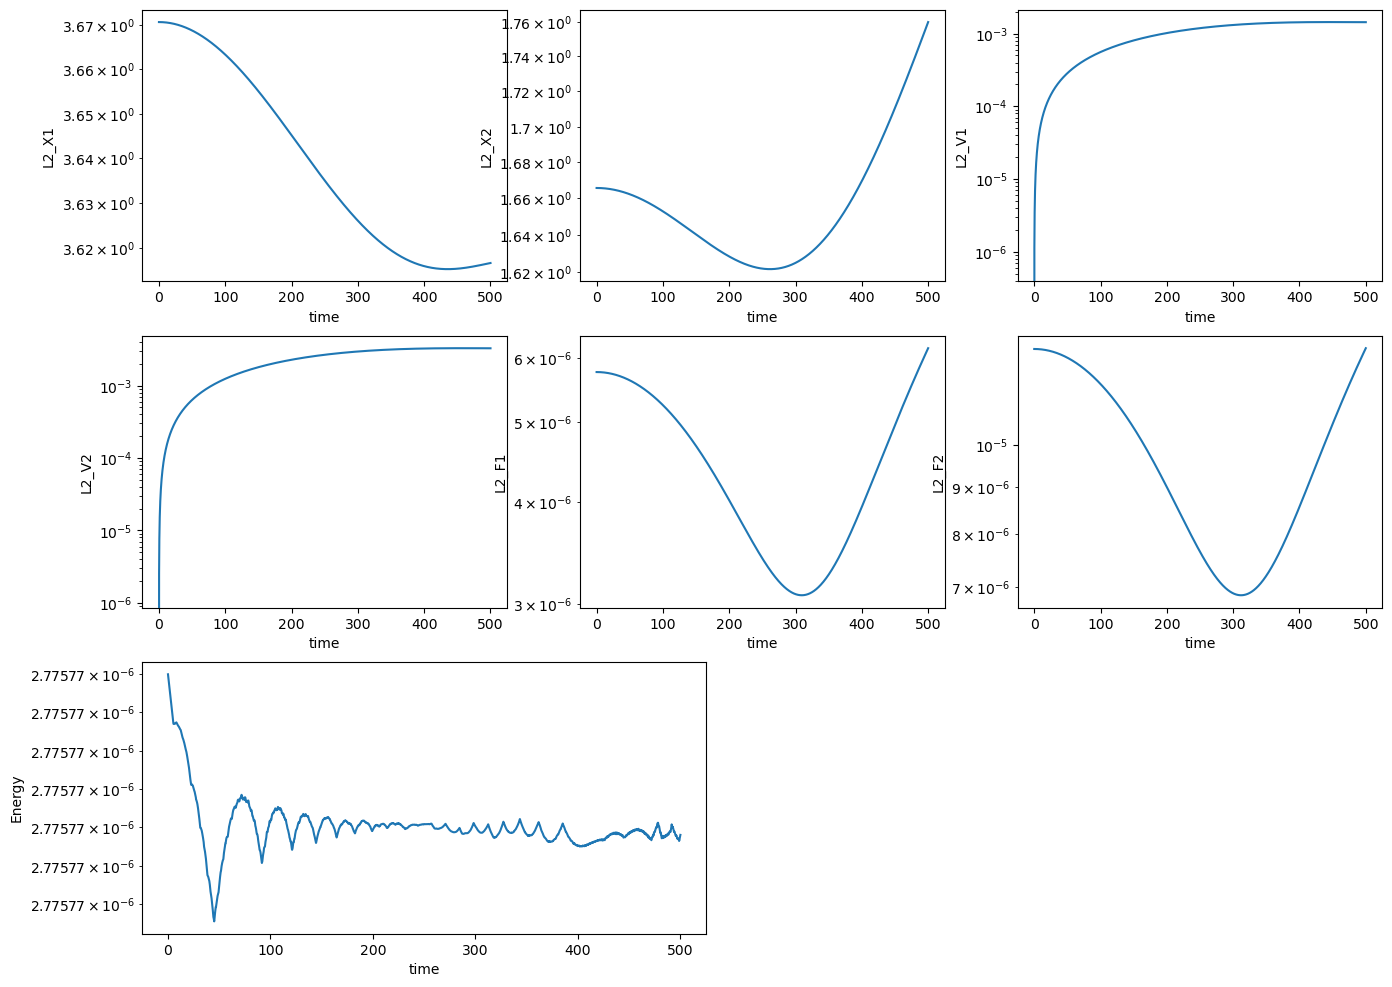

In [62]:
fig = plt.figure(figsize = (16,12))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,2,5)

ax1.plot(t,L2_X1)
ax1.set_xlabel("time")
ax1.set_ylabel("L2_X1")
ax1.set_yscale("log")

ax2.plot(t,L2_X2)
ax2.set_xlabel("time")
ax2.set_ylabel("L2_X2")
ax2.set_yscale("log")

ax3.plot(t,L2_V1)
ax3.set_xlabel("time")
ax3.set_ylabel("L2_V1")
ax3.set_yscale("log")

ax4.plot(t,L2_V2)
ax4.set_xlabel("time")
ax4.set_ylabel("L2_V2")
ax4.set_yscale("log")

ax5.plot(t,L2_F1)
ax5.set_yscale("log")
ax5.set_xlabel("time")
ax5.set_ylabel("L2_F1")

ax6.plot(t,L2_F2)
ax6.set_yscale("log")
ax6.set_xlabel("time")
ax6.set_ylabel("L2_F2")

ax7.plot(t,Hamiltonians)
ax7.set_xlabel("time")
ax7.set_ylabel("Energy")
ax7.set_yscale("log")

plt.savefig("Complex matrices with g = 0.001 and X's being chosen with mean 0 and std 1.jpg");

# With Real matrices

In [4]:
N = 2

X1 = np.zeros([N,N])
X2 = np.zeros([N,N])

for i in np.arange(N):
    
    for j in np.arange(N):
    
        k = np.random.rand()
        X1[i][j] = k+5500
        X1[j][i] = k+5500
        
    if (i == N-1) & (i == j):
        currentsum = 0
        for s in np.arange(N-1):
            currentsum += X1[s][s]
        
        X1[i][j] = -currentsum
        
            
for i in range(N):
    
    for j in range(N):

        k = np.random.rand()
        X2[i][j] = k + 5500
        X2[j][i] = k + 5500
        
    if (i == N-1) & (i == j):
        currentsum = 0
        for s in np.arange(N-1):
            currentsum += X2[s][s]
        
        X2[i][j] = -currentsum
        
V1 = np.zeros([N,N])
V2 = np.zeros([N,N])

X = np.array([X1,X2])
V = np.array([V1,V2])

In [5]:
X1_sol, X2_sol = np.zeros([2,int(1e6),N,N])
V1_sol, V2_sol = np.zeros([2,int(1e6),N,N])
F1_sol, F2_sol = np.zeros([2,int(1e6),N,N])
Energy = np.zeros(int(1e6))

dt = 1e-4
g = 0.001

for i in np.arange(int(100000)):
    
    F1_sol[i] = F1(X1,X2)
    F2_sol[i] = F2(X1,X2)
    
    X1_sol[i] = X1
    X2_sol[i] = X2
    V1_sol[i] = V1
    V2_sol[i] = V2
    
    X1_n = X1 + V1*dt + F1(X1,X2)*(dt**2)/2
    X2_n = X2 + V2*dt + F2(X1,X2)*(dt**2)/2
    
    V1 = V1 + (F1(X1,X2) + F1(X1_n,X2_n))*dt/2
    V2 = V2 + (F2(X1,X2) + F2(X1_n,X2_n))*dt/2
    
    X1, X2 = X1_n, X2_n
    
    Energy[i] = H(X1,X2,V1,V2)
    
    if i % 10000 == 0:
        print(H(X1,X2,V1,V2))

    if (np.isnan(H(X1,X2,V1,V2))):
        print(i)
        break
k = i

24.38717424481246
24.387174238819327
24.387174240067605
24.38717423065432
24.38717420725315
24.387174178615613
24.38717413854474
24.387174096133016
24.38717405010492
24.3871740055386


In [8]:
k

99999

In [9]:
len(L2_X1)

10

In [7]:
L2_X1 = np.zeros(int((k+1)/10000))
L2_X2 = np.zeros(int((k+1)/10000))
L2_V1 = np.zeros(int((k+1)/10000))
L2_V2 = np.zeros(int((k+1)/10000))
L2_F1 = np.zeros(int((k+1)/10000))
L2_F2 = np.zeros(int((k+1)/10000))
Hamiltonians = np.zeros(int((k+1)/10000))

for i in np.arange(k+1):

    if i % 10000 == 0:
        
        L2_X1[int(i/10000)] = np.linalg.norm(X1_sol[i])
        L2_X2[int(i/10000)] = np.linalg.norm(X2_sol[i])
        L2_V1[int(i/10000)] = np.linalg.norm(V1_sol[i])
        L2_V2[int(i/10000)] = np.linalg.norm(V2_sol[i])
        
        L2_F1[int(i/10000)] = np.linalg.norm(F1_sol[i])
        L2_F2[int(i/10000)] = np.linalg.norm(F2_sol[i])
        
        Hamiltonians[int(i/10000)]= Energy[i]

t = np.linspace(0,k*1e-4,int((k+1)/10000))

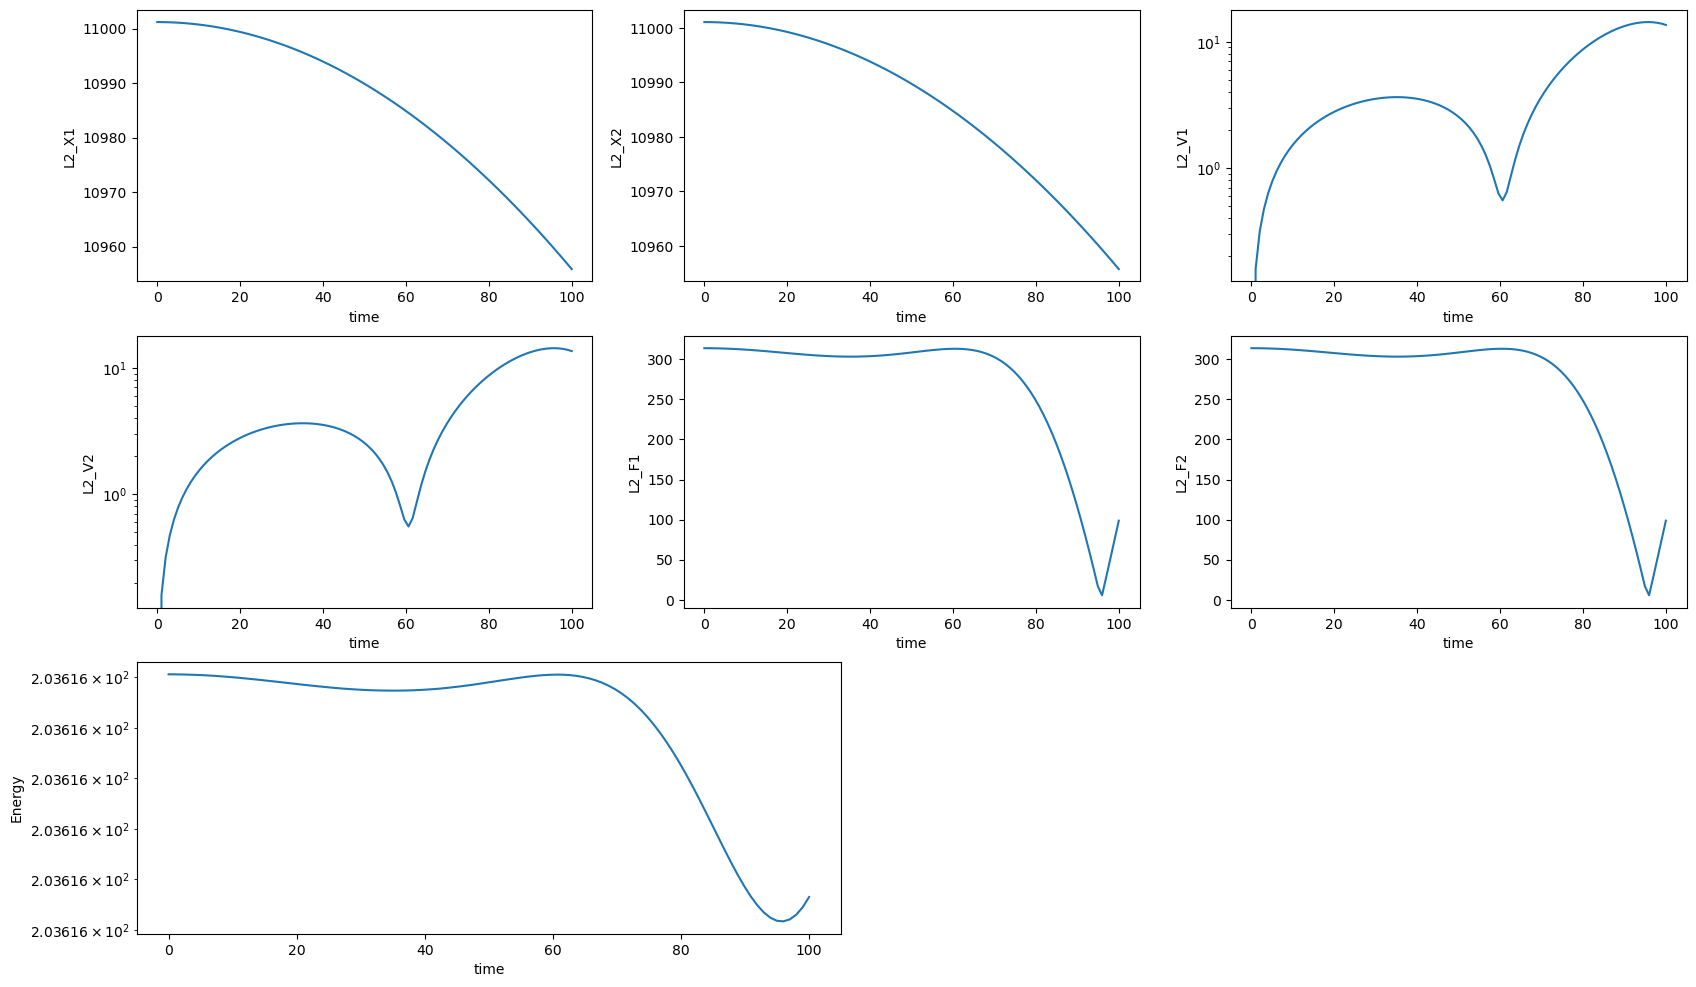

In [60]:
fig = plt.figure(figsize = (20,12))

ax1 = fig.add_subplot(3,3,1)
ax2 = fig.add_subplot(3,3,2)
ax3 = fig.add_subplot(3,3,3)
ax4 = fig.add_subplot(3,3,4)
ax5 = fig.add_subplot(3,3,5)
ax6 = fig.add_subplot(3,3,6)
ax7 = fig.add_subplot(3,2,5)

ax1.plot(t,L2_X1)
ax1.set_xlabel("time")
ax1.set_ylabel("L2_X1")
ax2.plot(t,L2_X2)
ax2.set_xlabel("time")
ax2.set_ylabel("L2_X2")
ax3.plot(t,L2_V1)
ax3.set_xlabel("time")
ax3.set_ylabel("L2_V1")
ax3.set_yscale("log")
ax4.plot(t,L2_V2)
ax4.set_xlabel("time")
ax4.set_ylabel("L2_V2")
ax4.set_yscale("log")
ax5.plot(t,L2_F1)
ax5.set_xlabel("time")
ax5.set_ylabel("L2_F1")
ax6.plot(t,L2_F2)
ax6.set_xlabel("time")
ax6.set_ylabel("L2_F2")
ax7.plot(t,Hamiltonians)
ax7.set_xlabel("time")
ax7.set_ylabel("Energy")
ax7.set_yscale("log")

plt.savefig("Real matrices with Energy H ~ 203.jpg");